# Preliminaries

In [10]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibrationDisplay

import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")
from aux import extract_cyclones, extract_target, find_neighbour, extract_zeros_samples, extract_images_withCenter, extract_images_all


pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [3]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Features Image

In [11]:
test

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,new_target,Real_tom_target,shear,target
0,0,2016-01-01,0.0,20.0,0.708822,1.376464,-0.589814,0.496678,0.801768,-0.682027,-0.246396,-1.588255,0.0,0.0,-1.051067,0
1,1,2016-01-01,0.0,22.5,0.680294,1.256578,-0.724351,0.646459,1.098060,-0.006185,0.371715,-1.588255,0.0,0.0,-0.930351,0
2,2,2016-01-01,0.0,25.0,-0.098194,0.998153,-0.686858,0.711097,1.311539,-0.034726,0.980932,-1.588255,0.0,0.0,-0.817038,0
3,3,2016-01-01,0.0,27.5,-0.372318,1.092833,-0.738429,0.747962,1.341712,-0.071024,0.655287,-1.588255,0.0,0.0,-0.744643,0
4,4,2016-01-01,0.0,30.0,-1.089892,1.045512,-0.699460,0.645171,0.850442,-0.520021,0.030505,-1.588255,0.0,0.0,-0.966543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963984,137600,2022-12-31,-30.0,80.0,0.677806,-1.271307,0.290892,-0.727302,0.813190,-0.684904,-0.431475,0.601392,0.0,0.0,0.050674,0
963985,137601,2022-12-31,-30.0,82.5,0.898493,-1.325164,0.224460,-0.764678,1.178495,-0.105389,-0.107881,0.599524,0.0,0.0,0.004080,0
963986,137602,2022-12-31,-30.0,85.0,1.629797,-1.468220,0.376651,-0.566606,1.728863,0.450626,-0.082227,0.597113,0.0,0.0,0.220205,0
963987,137603,2022-12-31,-30.0,87.5,0.280770,-1.453315,0.621629,-0.446284,2.368318,0.792994,-0.000815,0.594579,0.0,0.0,0.648118,0


In [30]:
train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
test = test.loc[test.time>='2016-04-01']

train['shear'] = train.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
val['shear'] = val.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
test['shear'] = test.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)

scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])

#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_img_std = extract_images(train_std, variables, verbose=True)
val_img_std = extract_images(val_std, variables, verbose=False)
test_img_std = extract_images(test_std, variables, verbose=False)
test_img_std_old = extract_images(test_std.loc[test.time<='2019-12-01'], variables, verbose=False)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300


# Targets images

In [24]:
### Extract new images, 48h aggregations, one day ahead

train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

variables = [ 'target']
y_train_img = extract_images(y_train, variables, verbose=True)
y_val_img = extract_images(y_val, variables, verbose=True)
y_test_img = extract_images(y_test, variables, verbose=True)



100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [107]:
### Extract new images, 48h aggregations, one day ahead, no sea

train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)

mask = pd.read_csv('sea_mask.csv')
sea_latLon = list(mask.apply(lambda x: [x.latitude,x.longitude], axis=1))

train['target_sea'] = train.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)
val['target_sea'] = val.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)
test['target_sea'] = test.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)

y_train_sea = train.loc[:,['target_sea','latitude','longitude','time']]
y_val_sea = val.loc[:,['target_sea','latitude','longitude','time']]
y_test_sea = test.loc[:,['target_sea','latitude','longitude','time']]

variables = [ 'target_sea']
y_train_img_sea = extract_images(y_train_sea, variables, verbose=True)
y_val_img_sea = extract_images(y_val_sea, variables, verbose=True)
y_test_img_sea = extract_images(y_test_sea, variables, verbose=True)






100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [27]:
### Extract old images, 24h aggregations, one day ahead

test_old = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv').drop(columns=['Unnamed: 0'])
train_old = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv').drop(columns=['Unnamed: 0'])
val_old = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv').drop(columns=['Unnamed: 0'])
test_old = test_old.loc[test_old.time>='2016-04-01']


y_train_old = train_old.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_val_old = val_old.loc[:,['Real_tom_lsm','latitude','longitude','time']]
y_test_old = test_old.loc[:,['Real_tom_lsm','latitude','longitude','time']]

variables_old = [ 'Real_tom_lsm']
y_train_img_old = extract_images(y_train_old, variables_old, verbose=True)
y_val_img_old = extract_images(y_val_old, variables_old, verbose=True)
y_test_img_old = extract_images(y_test_old, variables_old, verbose=True)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [31]:
print(train_img_std.shape, val_img_std.shape, test_img_std.shape, test_img_std_old.shape)

(11323, 13, 29, 9) (1826, 13, 29, 9) (2466, 13, 29, 9) (1340, 13, 29, 9)


In [32]:
print(y_train_img.shape, y_val_img.shape, y_test_img.shape)

(11323, 13, 29, 1) (1826, 13, 29, 1) (2466, 13, 29, 1)


In [33]:
print(y_train_img_old.shape, y_val_img_old.shape, y_test_img_old.shape)

(11323, 13, 29, 1) (1826, 13, 29, 1) (1340, 13, 29, 1)


# CNN 1 day lag

## old target

In [36]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [37]:
model.fit(train_img_std, y_train_img_old, validation_data=(val_img_std,y_val_img_old),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-03 17:44:48.966141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0339

2023-03-03 17:44:53.800459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 6s 10ms/step - loss: 0.0339 - val_loss: 0.0089
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0062 - val_loss: 0.0054


42/42 [==============================] - 0s 3ms/step


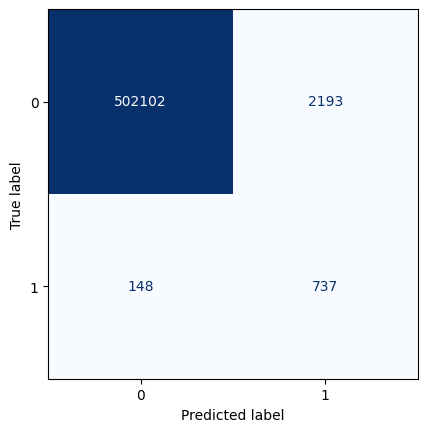

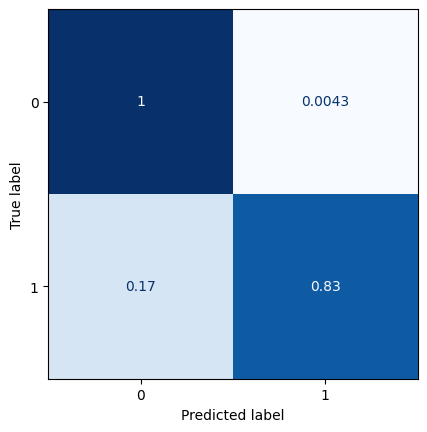

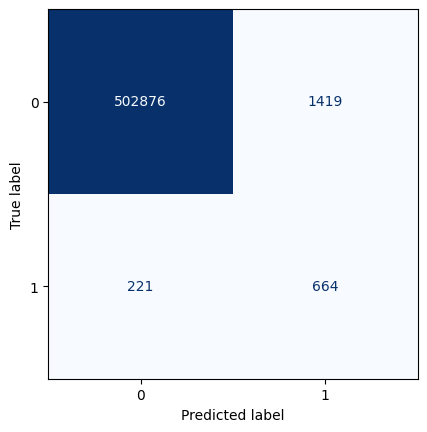

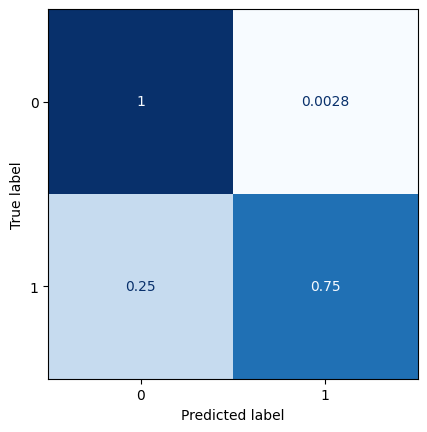

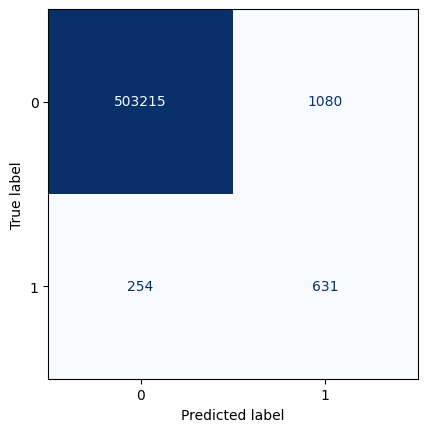

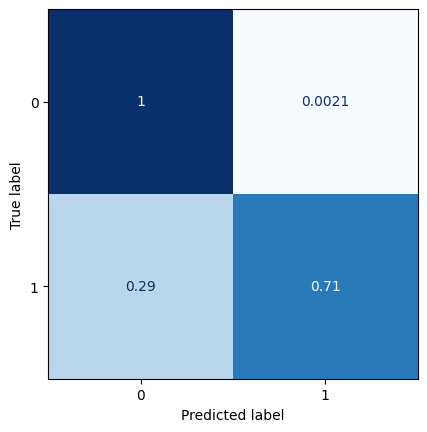

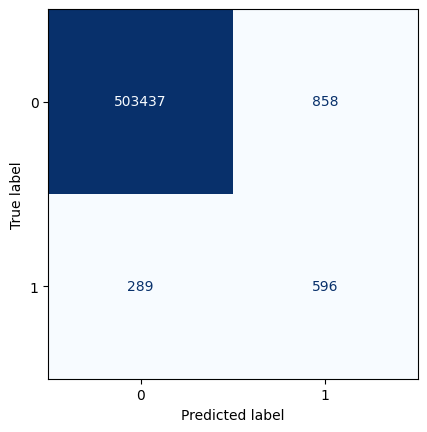

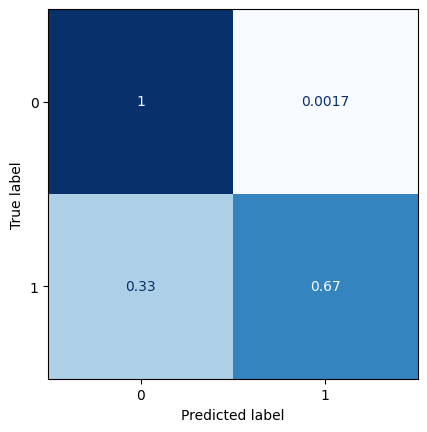

In [40]:
t = model.predict(test_img_std_old)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

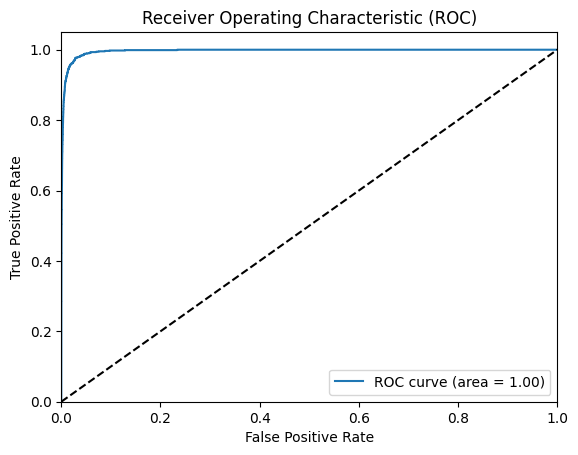

In [43]:
plot_roc(t.reshape(-1,1),y_test_img_old.reshape(-1,1))

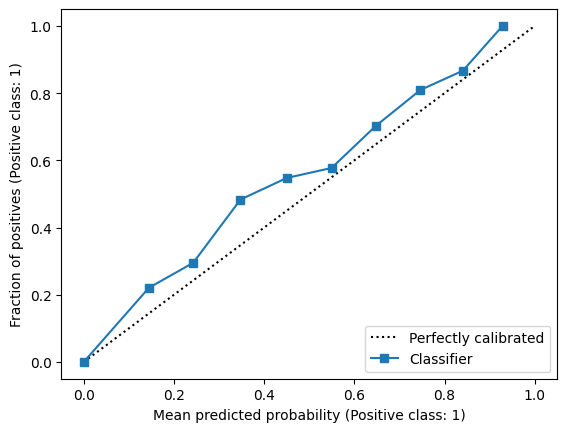

In [44]:
display = CalibrationDisplay.from_predictions(y_test_img_old.reshape(-1,1), t.reshape(-1,1), n_bins=10)

In [45]:
brier_score_loss(y_test_img_old.reshape(-1,1), t.reshape(-1,1))

0.0011395209536738998

In [46]:
brier_score_loss(y_test_img_old.reshape(-1,1), np.zeros(len(y_test_img_old.reshape(-1,1))))

0.001751850825448355

## New target

In [47]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_2 (Cropping2D)   (None, 13, 29, 1)        

In [48]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-03 17:52:21.070849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0566

2023-03-03 17:52:24.186846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 9ms/step - loss: 0.0566 - val_loss: 0.0172
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0181 - val_loss: 0.0146
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0165 - val_loss: 0.0141
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0158 - val_loss: 0.0135
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0153 - val_loss: 0.0133
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0148 - val_loss: 0.0134
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0145 - val_loss: 0.0127
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0141 - val_loss: 0.0126
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0135 - val_loss: 0.0120
E

63/78 [=======================>......] - ETA: 0s

2023-03-03 17:55:53.078232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 3ms/step


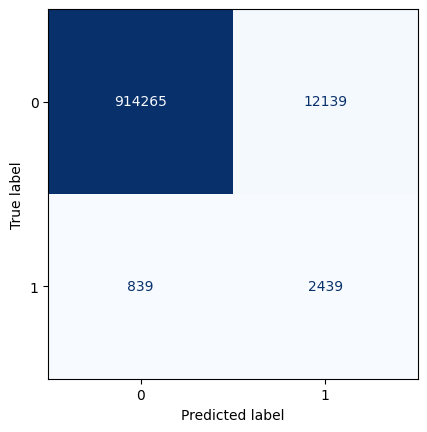

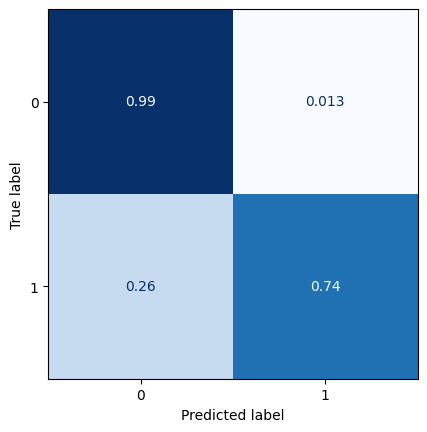

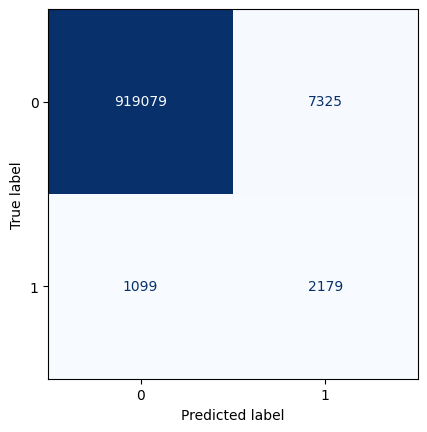

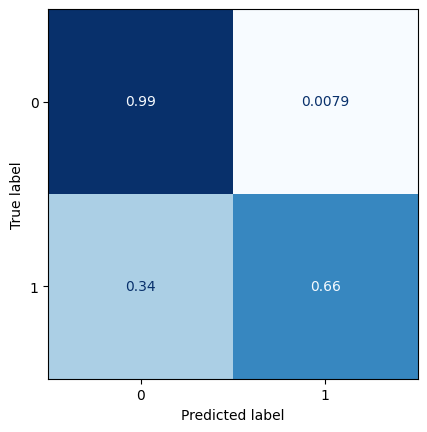

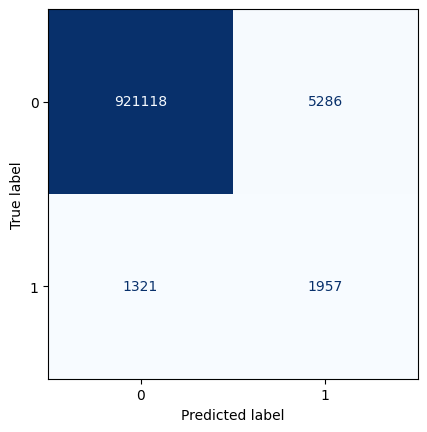

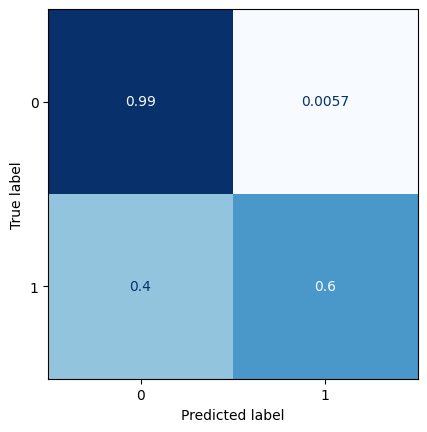

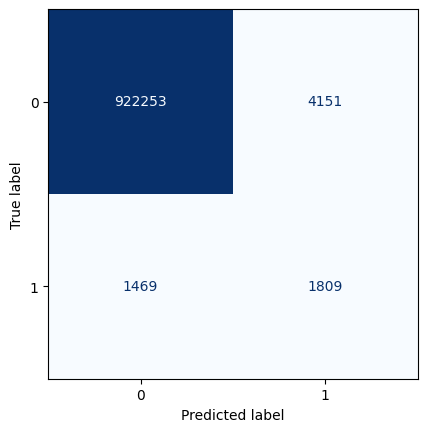

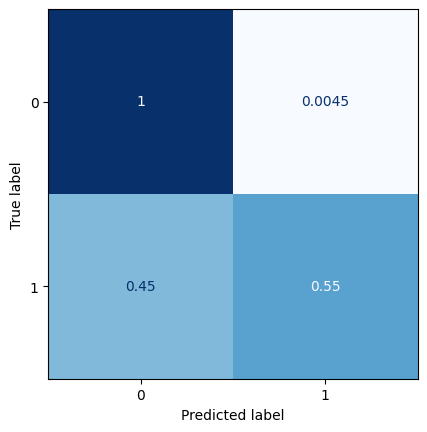

In [49]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

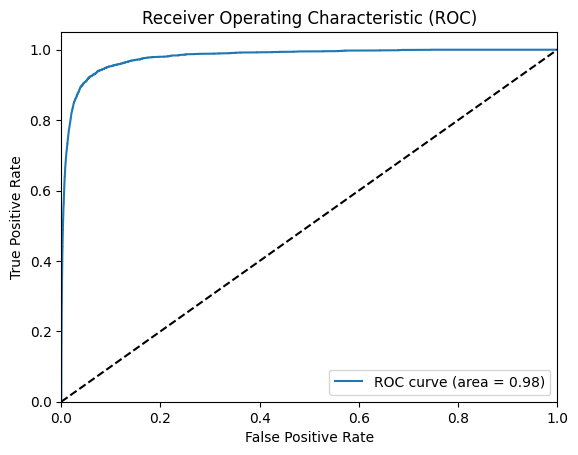

0.002753372822628331
0.0035259368257102965


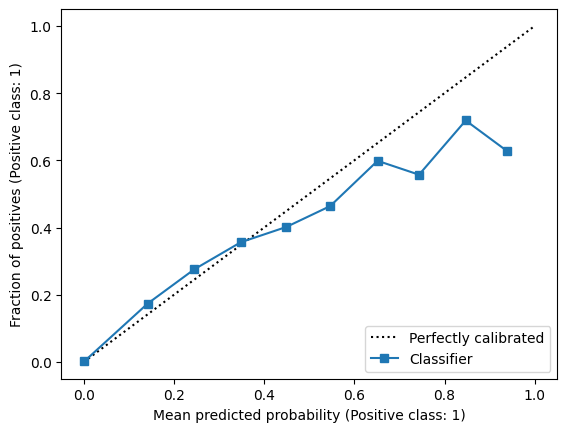

In [50]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))

## old target, next 48 hours

In [101]:
y_test_img_old_24_48 = np.zeros(y_test_img_old.shape)
for i in range(y_test_img_old.shape[0]-1):
    y_test_img_old_24_48[i] = y_test_img_old[i]+y_test_img_old[i+1]


In [102]:
y_test_img_old_24_48[y_test_img_old_24_48==2]=1

In [88]:
y_val_img_old_24_48 = np.zeros(y_val_img_old.shape)
for i in range(y_val_img_old.shape[0]-1):
    y_val_img_old_24_48[i] = y_val_img_old[i]+y_val_img_old[i+1]

y_val_img_old_24_48[y_val_img_old_24_48==2]=1


In [89]:
y_train_img_old_24_48 = np.zeros(y_train_img_old.shape)
for i in range(y_train_img_old.shape[0]-1):
    y_train_img_old_24_48[i] = y_train_img_old[i]+y_train_img_old[i+1]

y_train_img_old_24_48[y_train_img_old_24_48==2]=1


In [96]:
# class 1 if there is a TC 2 days later

model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_5 (Cropping2D)   (None, 13, 29, 1)        

In [97]:
model.fit(train_img_std[:-1], y_train_img_old_24_48[:-1], validation_data=(val_img_std[:-1],y_val_img_old_24_48[:-1]),
        callbacks=[monitor],epochs=100)


Epoch 1/100
  1/354 [..............................] - ETA: 1:40 - loss: 0.9328

2023-03-03 23:39:53.999882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0611

2023-03-03 23:39:56.790680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0611 - val_loss: 0.0169
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0171 - val_loss: 0.0131
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0142 - val_loss: 0.0118
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0131 - val_loss: 0.0112
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0124 - val_loss: 0.0104
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0119 - val_loss: 0.0100
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0111 - val_loss: 0.0095
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0106 - val_loss: 0.0091
E

42/42 [==============================] - 0s 3ms/step


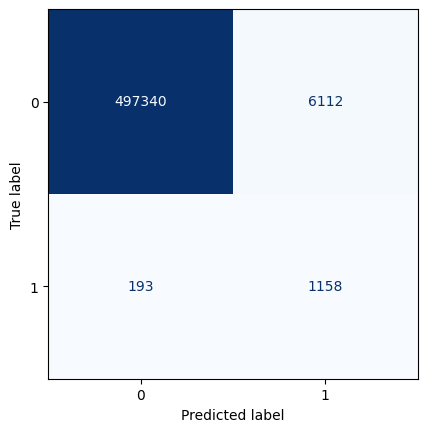

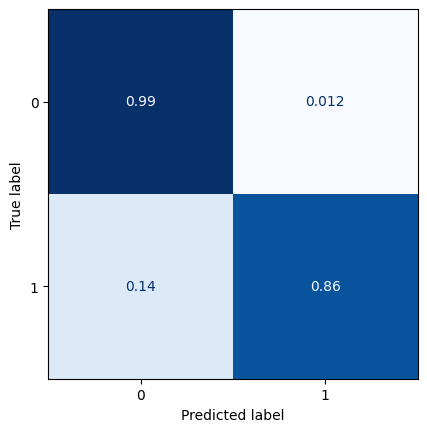

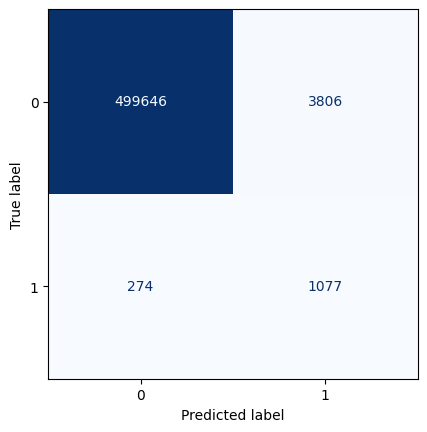

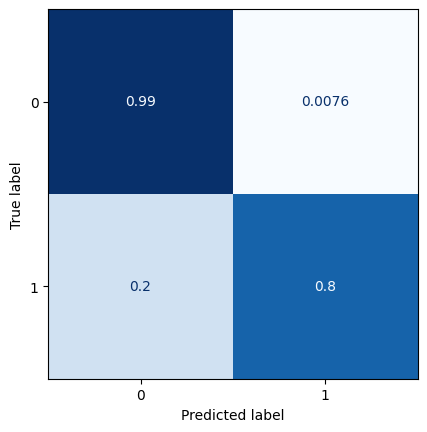

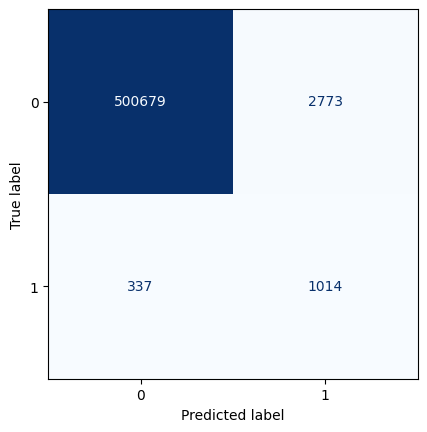

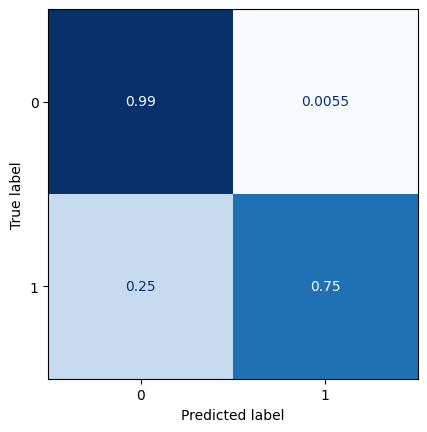

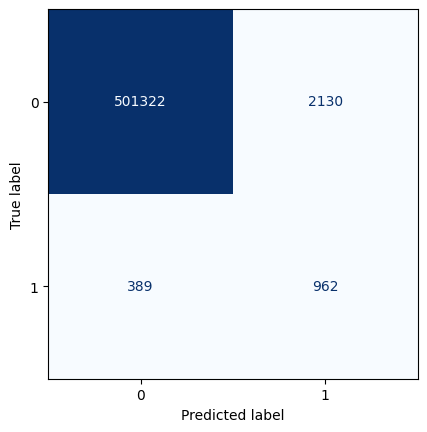

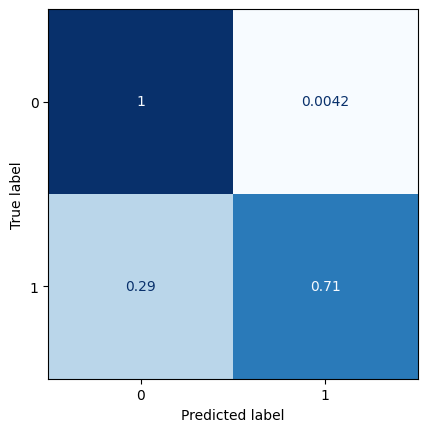

In [103]:
t = model.predict(test_img_std_old[:-1])

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old_24_48[:-1].reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old_24_48[:-1].reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

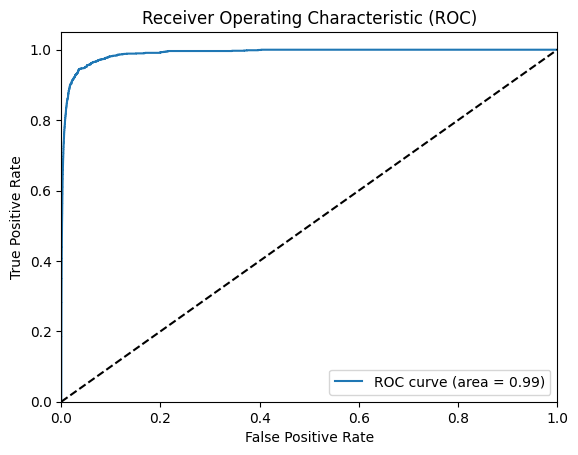

0.0018412954632034647
0.0026762915434337753


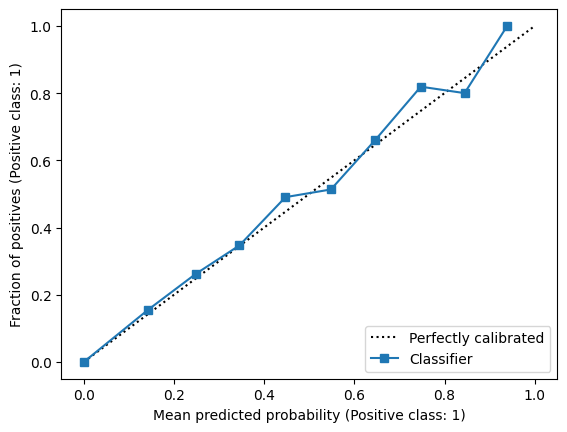

In [104]:
plot_roc(t.reshape(-1,1),y_test_img_old_24_48[:-1].reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img_old_24_48[:-1].reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img_old_24_48[:-1].reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img_old_24_48[:-1].reshape(-1,1), np.zeros(len(y_test_img_old_24_48[:-1].reshape(-1,1)))))

## new target, without the sea

In [108]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_6 (Cropping2D)   (None, 13, 29, 1)        

In [109]:
model.fit(train_img_std, y_train_img_sea, validation_data=(val_img_std,y_val_img_sea),
        callbacks=[monitor],epochs=100)

Epoch 1/100
  1/354 [..............................] - ETA: 2:05 - loss: 0.4397

2023-03-03 23:54:21.496881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0350

2023-03-03 23:54:24.487648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 9ms/step - loss: 0.0350 - val_loss: 0.0148
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0159 - val_loss: 0.0129
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0145 - val_loss: 0.0126
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0138 - val_loss: 0.0121
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0130 - val_loss: 0.0111
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0127 - val_loss: 0.0111
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0125 - val_loss: 0.0107
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0122 - val_loss: 0.0108
E

354/354 [==============================] - 3s 7ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 82/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 83/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 84/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 85/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 86/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 87/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 88/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 89/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 90/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0102 - val_loss: 

42/78 [===============>..............] - ETA: 0s

2023-03-03 23:58:22.050616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 3ms/step


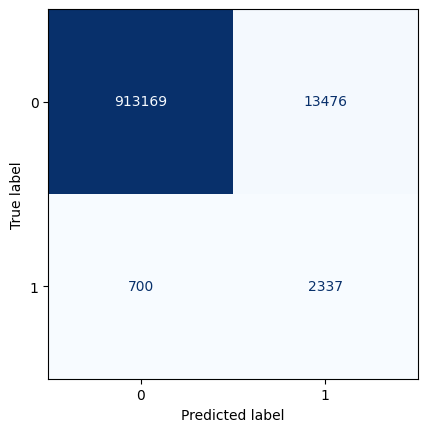

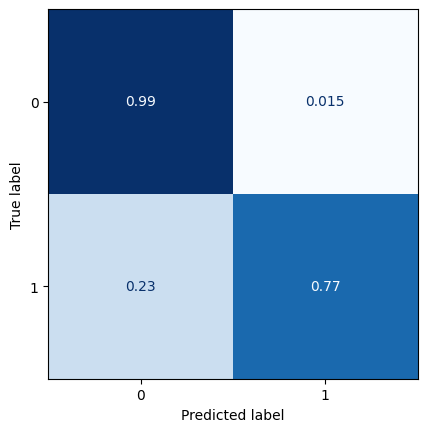

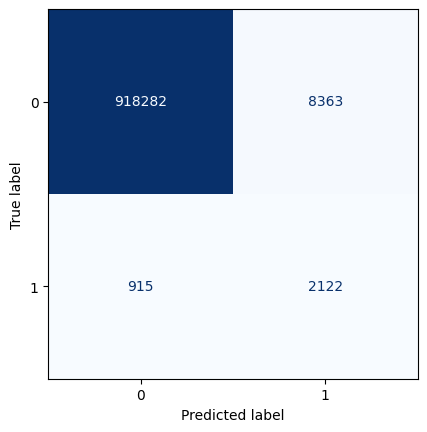

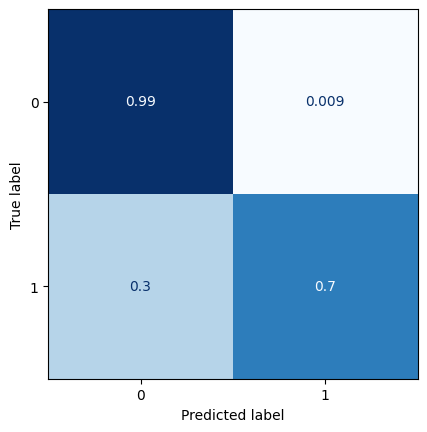

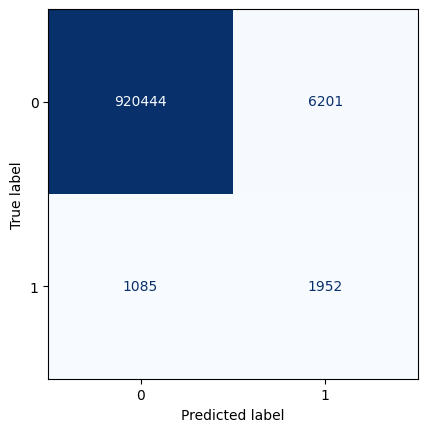

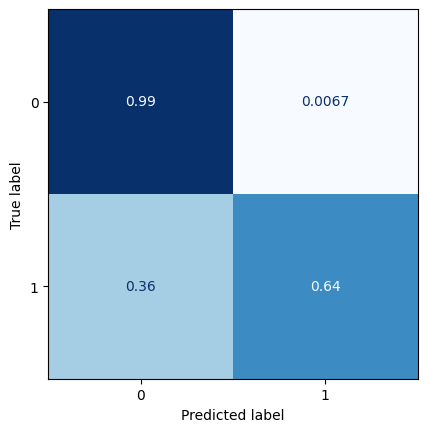

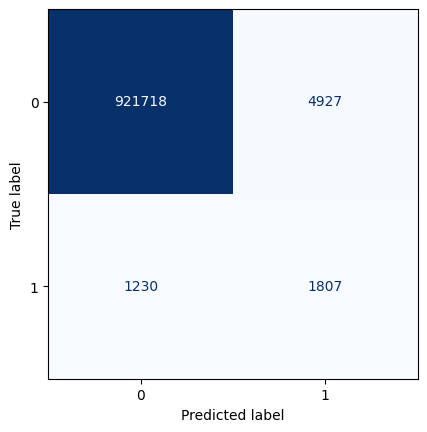

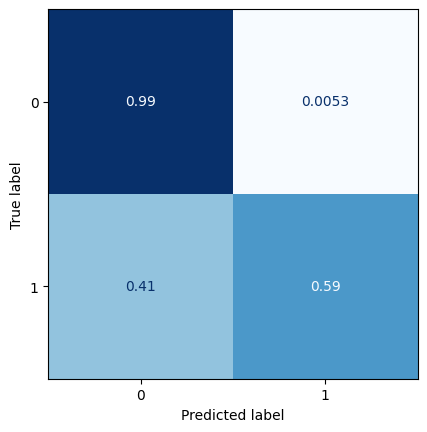

In [110]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_sea.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_sea.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

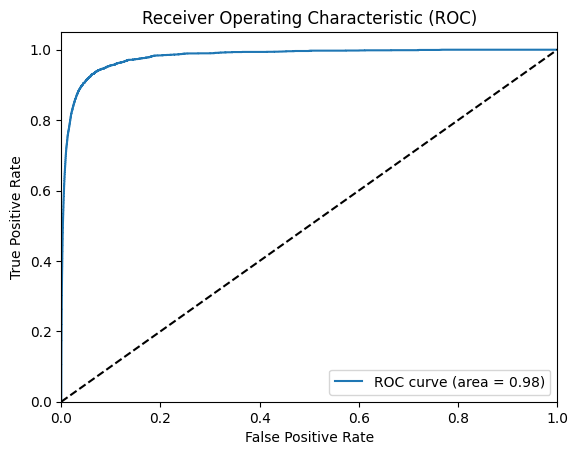

0.0025747379028196217
0.003266708401367349


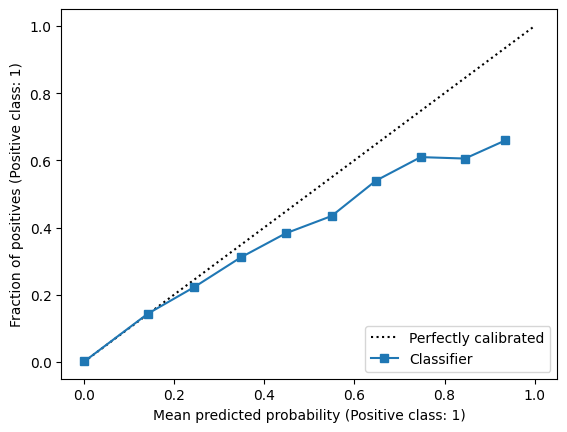

In [111]:
plot_roc(t.reshape(-1,1),y_test_img_sea.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img_sea.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img_sea.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img_sea.reshape(-1,1), np.zeros(len(y_test_img_sea.reshape(-1,1)))))

# CNN 2 day lag 

## old target

In [52]:
# class 1 if there is a TC 2 days later

model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_3 (Cropping2D)   (None, 13, 29, 1)        

In [55]:
model.fit(train_img_std[:-1], y_train_img_old[1:], validation_data=(val_img_std[:-1],y_val_img_old[1:]),
        callbacks=[monitor],epochs=100)

Epoch 1/100
  1/354 [..............................] - ETA: 1:56 - loss: 0.3012

2023-03-03 18:10:35.290088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0220

2023-03-03 18:10:38.638944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 11ms/step - loss: 0.0220 - val_loss: 0.0103
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0081 - val_loss: 0.0076


42/42 [==============================] - 0s 3ms/step


2023-03-03 18:12:48.462413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


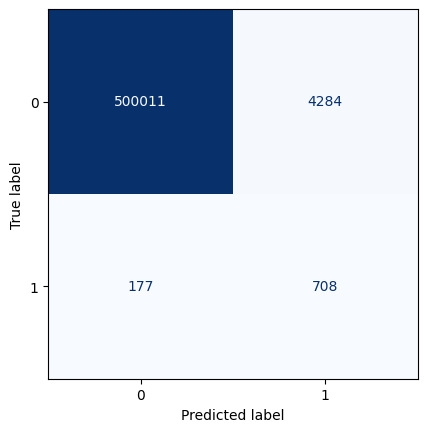

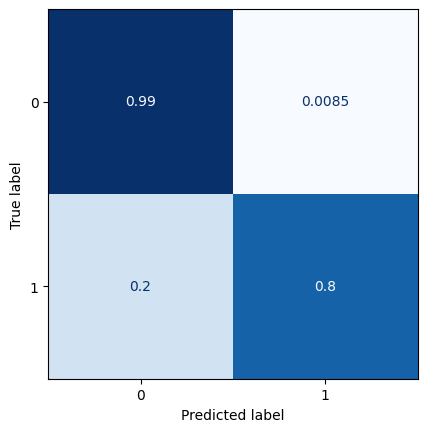

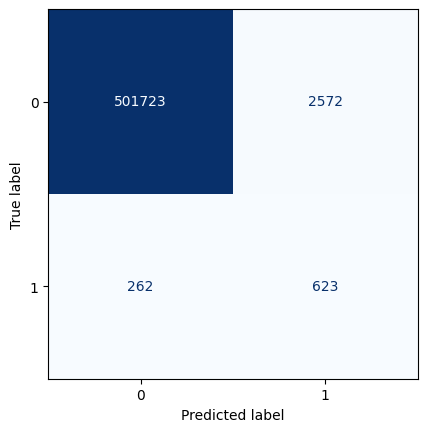

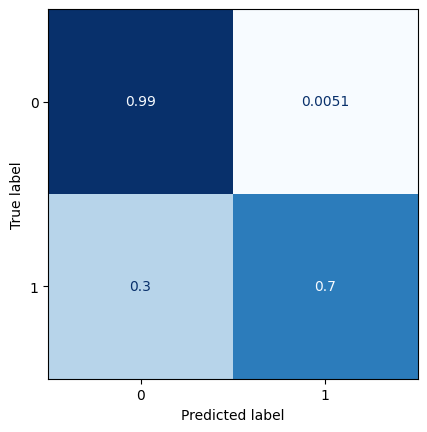

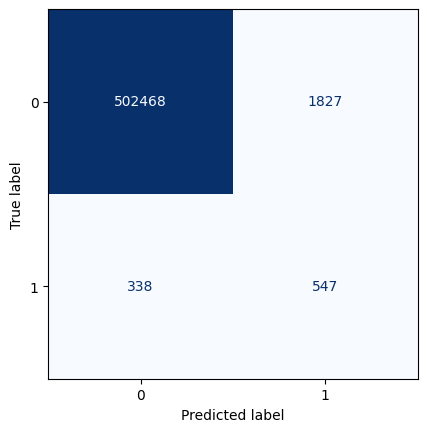

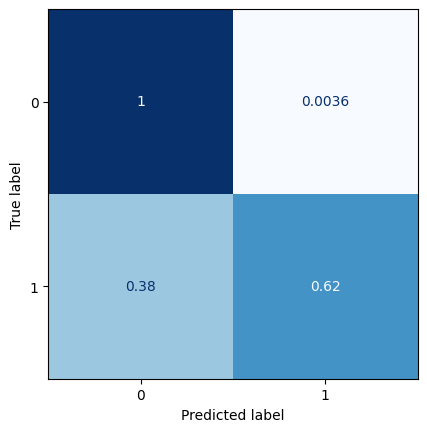

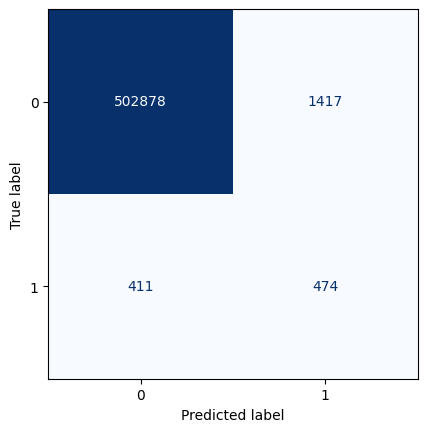

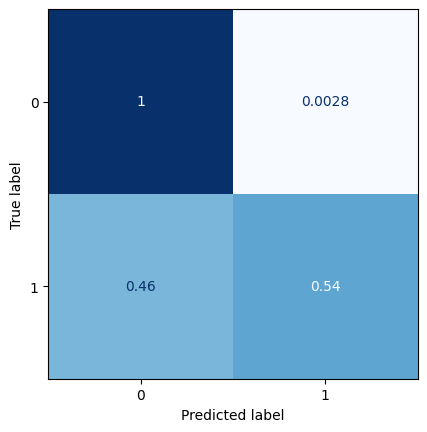

In [56]:
t = model.predict(test_img_std_old)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_old.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

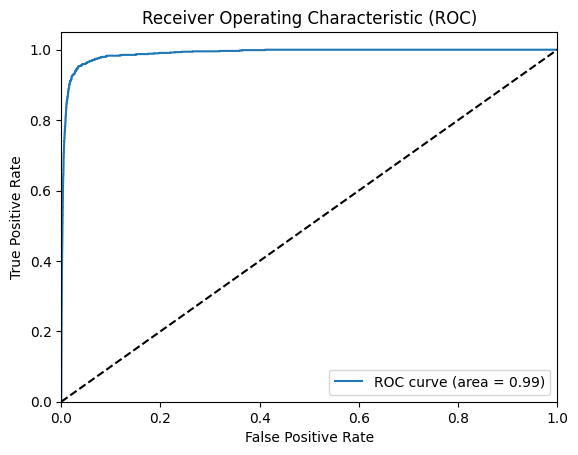

0.0014467711093472987
0.001751850825448355


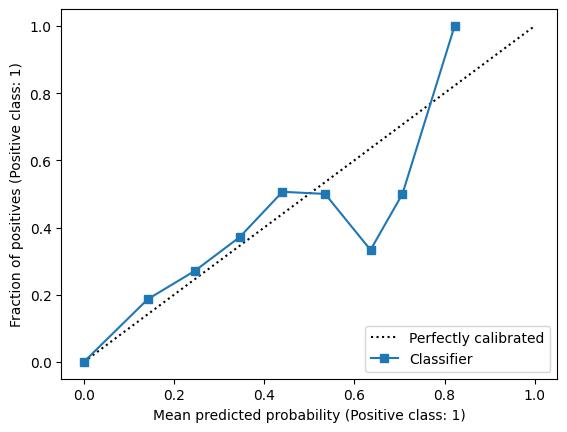

In [59]:
plot_roc(t.reshape(-1,1),y_test_img_old.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img_old.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img_old.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img_old.reshape(-1,1), np.zeros(len(y_test_img_old.reshape(-1,1)))))